# Sanity Checking the NQG simulation

This notebook performs a simulation run with the default parameter set
for a single run. It is meant to provide quick diagnostics on the model
capabilities.

There are four parts for this notebook:
- Part 1. Dependences & Set-up
- Part 2. Simulation set-up & execution
- Part 3. Compute Metrics
- Part 4. Compute Trust & Delegation Graph

## Part 1. Dependences & Set-up

On this step, we'll import all required libraries and perform any required assumption.

In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd
from collections import defaultdict

import colorsys
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from netgraph import Graph

from cadCAD_tools import easy_run

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

On this step, we'll setup the simulation with the default run parameters
and execute it.

In [2]:
from nqg_model.params import INITIAL_STATE
from nqg_model.params import SINGLE_RUN_PARAMS
from nqg_model.params import TIMESTEPS
from nqg_model.params import SAMPLES
from nqg_model.structure import NQG_MODEL_BLOCKS

default_run_args = (INITIAL_STATE,
                     {k: [v] for k, v in SINGLE_RUN_PARAMS.items()},
                    NQG_MODEL_BLOCKS,
                    TIMESTEPS,
                    SAMPLES)
sim_df = easy_run(*default_run_args, assign_params=False).set_index('days_passed')


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 1, 10)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 1, 10)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/501 [00:00<?, ?it/s]

Total execution time: 0.72s


In [3]:
sim_df.head(5)

,delta_days,users,user_round_decisions,delegatees,trustees,action_matrix,vote_matrix,per_project_voting,oracle_state,simulation,subset,run,timestep
days_passed,,,,,,,,,,,,,
0.0,NaN,[],{},{},{},{},{},{},"OracleState(pagerank_results={}, reputation_bo...",0,0,1,0
1.0,1.0,"[User(label=0, reputation=<ReputationCategory....","{0: Action.RoundVote, 2: Action.Delegate, 4: A...",{2: []},"{0: {}, 2: {}, 4: {}}","{0: {'proj_7': Vote.Abstain, 'proj_2': Vote.Ye...","{0: {'proj_7': 0.0, 'proj_2': 1.3, 'proj_14': ...","{'proj_7': 0.0, 'proj_2': 1.3, 'proj_14': 0.0,...",OracleState(pagerank_results={0: 0.33333333333...,0,0,1,1
2.0,1.0,"[User(label=0, reputation=<ReputationCategory....","{0: Action.RoundVote, 2: Action.Delegate, 4: A...",{2: []},"{0: {}, 2: {}, 4: {}, 3: {0, 2, 4}}","{0: {'proj_7': Vote.Abstain, 'proj_2': Vote.Ye...","{0: {'proj_7': 0.0, 'proj_2': 1.3, 'proj_14': ...","{'proj_7': 1.2, 'proj_2': 3.8, 'proj_14': -1.2...",OracleState(pagerank_results={0: 0.26460475027...,0,0,1,2
3.0,1.0,"[User(label=0, reputation=<ReputationCategory....","{0: Action.RoundVote, 2: Action.Delegate, 4: A...",{2: []},"{0: {}, 2: {}, 4: {}, 3: {0, 2, 4}}","{0: {'proj_7': Vote.Abstain, 'proj_2': Vote.Ye...","{0: {'proj_7': 0.0, 'proj_2': 1.3, 'proj_14': ...","{'proj_7': 2.4, 'proj_2': 6.3, 'proj_14': -2.4...",OracleState(pagerank_results={0: 0.26460475027...,0,0,1,3
4.0,1.0,"[User(label=0, reputation=<ReputationCategory....","{0: Action.RoundVote, 2: Action.Delegate, 4: A...",{2: []},"{0: {}, 2: {}, 4: {}, 3: {0, 2, 4}, 6: {0, 2, ...","{0: {'proj_7': Vote.Abstain, 'proj_2': Vote.Ye...","{0: {'proj_7': 0.0, 'proj_2': 1.3, 'proj_14': ...","{'proj_7': 4.699999999999999, 'proj_2': 8.7999...",OracleState(pagerank_results={0: 0.22614834662...,0,0,1,4


In [4]:
sim_df.columns

Index(['delta_days', 'users', 'user_round_decisions', 'delegatees', 'trustees',
       'action_matrix', 'vote_matrix', 'per_project_voting', 'oracle_state',
       'simulation', 'subset', 'run', 'timestep'],
      dtype='object')

## Part 3. Compute Metrics

On this step, we'll extract temporal metrics that are derivated
from the generated dataset and visualize them over time

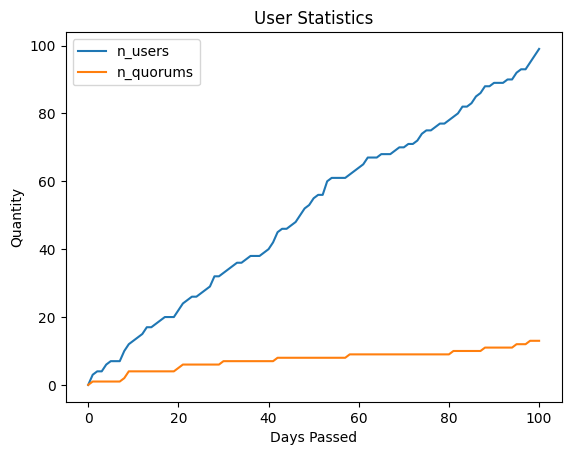

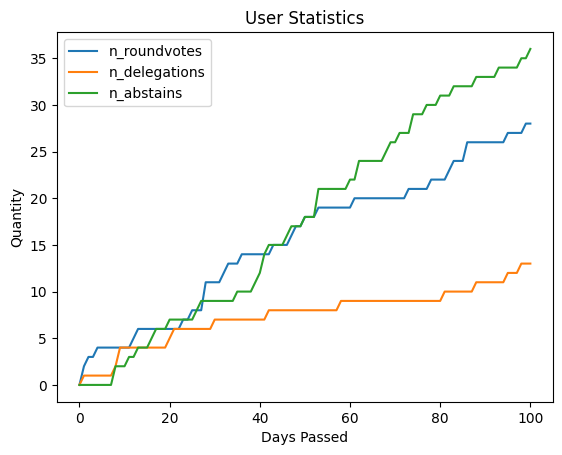

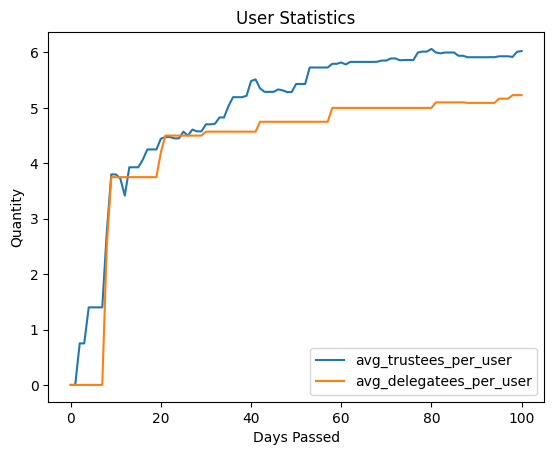

In [5]:
from nqg_model.types import Action
# Global metrics

metrics = {
    'n_users': lambda row: len(row.users),
    'n_quorums': lambda row: len(row.delegatees),
    'n_roundvotes': lambda row: len([1 for u, d in row.user_round_decisions.items() if d == Action.RoundVote]),
    'n_delegations': lambda row: len([1 for u, d in row.user_round_decisions.items() if d == Action.Delegate]),
    'n_abstains': lambda row: len([1 for u, d in row.user_round_decisions.items() if d == Action.Abstain]),
    'avg_trustees_per_user': lambda row: sum(len(l) for l in row.trustees.values()) / len(row.trustees) if len(row.trustees) > 0 else 0.0,
    'avg_delegatees_per_user': lambda row: sum(len(l) for l in row.delegatees.values()) / len(row.delegatees) if len(row.delegatees) > 0 else 0.0,
}



new_df = sim_df.apply(metrics.values(), axis='columns')
new_df.columns = list(metrics.keys())

new_df[['n_users', 'n_quorums']].plot(xlabel='Days Passed', ylabel='Quantity', title='User Statistics')
plt.show()

new_df[['n_roundvotes', 'n_delegations', 'n_abstains']].plot(xlabel='Days Passed', ylabel='Quantity', title='User Statistics')
plt.show()


new_df[['avg_trustees_per_user', 'avg_delegatees_per_user']].plot(xlabel='Days Passed', ylabel='Quantity', title='User Statistics')
plt.show()

/var/folders/y4/dvc6qr5j30s3frwztjt5shg40000gn/T/ipykernel_52536/3580234388.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



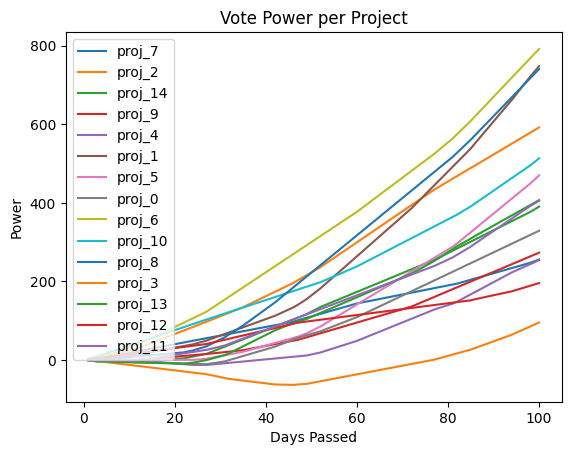

In [6]:
# Per project metrics

per_proj_votes = sim_df.per_project_voting.apply(pd.Series).dropna()
per_proj_votes.plot(title='Vote Power per Project', xlabel='Days Passed', ylabel='Power')
plt.show()

## Part 4. Compute Trust & Delegation Graph

On this step, we will instatiate the Trust & Delegation graph for each
point on time and visualize them

In [7]:
def render_trust_delegation_graphs(i):
    t = sim_df.iloc[i].name
    trust_graph_per_day = sim_df.trustees.map(nx.DiGraph)
    delegatee_graph_per_day = sim_df.delegatees.map(nx.DiGraph)

    def sample_colors_from_hue(N):
        import colorsys
        HSV_tuples = [(x*1.0/N, 1.0, 0.8) for x in range(N)]
        RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
        return list(RGB_tuples)

    cmap = matplotlib.colormaps['BrBG']

    def render_graph(G, 
                    weights,
                    K=1, 
                    q=1, 
                    title="", 
                    a=1, 
                    node_color=None,
                    edge_color=None,
                    edge_alpha=0.5,
                    edge_width=0.1,
                    **kwargs):
        sizes = {k: a + K * v ** q for k, v in weights.items()}
        if node_color is None:
            node_color = {k: cmap(i / len(weights)) for i, k in enumerate(sorted(weights.keys()))}
        else:
            pass
        fig = plt.figure(figsize=(10, 2), dpi=200) 
        ax = fig.add_subplot(1, 1, 1)
        g = Graph(G, 
                ax=ax,
                node_size=sizes,
                node_edge_width=0,
                edge_width=edge_width,
                node_color=node_color,
                edge_alpha=edge_alpha,
                edge_color=edge_color,
                **kwargs)
        ax.set_facecolor(colorsys.hsv_to_rgb(0.0, 0.0, 0.9))
        fig.set_facecolor(colorsys.hsv_to_rgb(0.0, 0.0, 0.9))
        plt.title(title, fontname='Helvetica')
        plt.show()


    G = trust_graph_per_day.iloc[i]
    weights = sim_df.iloc[i].oracle_state.pagerank_results
    render_graph(G, 
                weights, 
                K=20, 
                q=0.5, 
                a=0, 
                title=f"Trust Graph at day {t:.0f}",
                edge_layout='curved',
                node_layout='spring',
                edge_width=0.1,
                arrows=True,
                scale=(4,1))

    G = delegatee_graph_per_day.iloc[i]
    weights = {k: 0 for k in G.nodes}
    weights |= {k: len(v) * 0.2 for k, v in sim_df.iloc[i].delegatees.items()}
    quorums = sim_df.iloc[i].delegatees
    source_color_map = {k: matplotlib.colormaps['tab10'](i/len(quorums))
                        for i, k in enumerate(quorums.keys())}
    edge_color = {(a,b): source_color_map[a] for (a, b) in G.edges}
    render_graph(G, weights, 
                K=0, 
                q=1, 
                a=2, 
                title=f'Delegation Graph at day {t:.0f}', 
                edge_color=edge_color,
                edge_width=1.0,
                edge_alpha=0.9,
                arrows=True,
                edge_layout='curved',
                node_layout='spring',
                scale=(4,1))

### Visualizing the Trust & Delegation Graphs

On the following visualizations, we have the following definitions:

- Node colors are assigned such that older users are dark brown and newer users are dark green.
- The size of the nodes on the trust graph are proportional to the trust bonus
- The colors of the edges on the delegation graph are equal for a given quorum

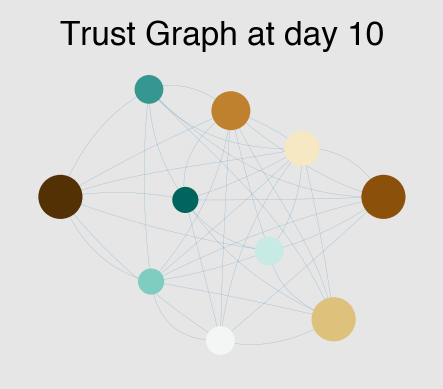

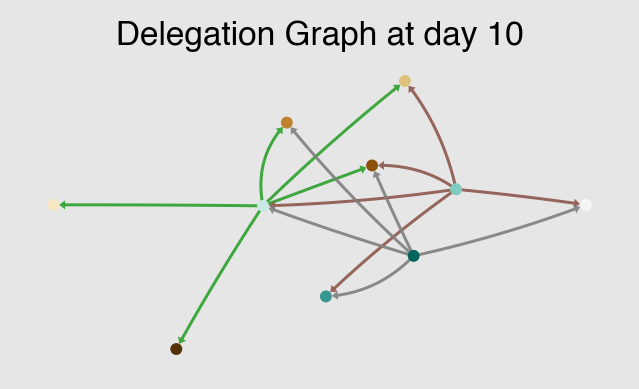

In [8]:
render_trust_delegation_graphs(10)

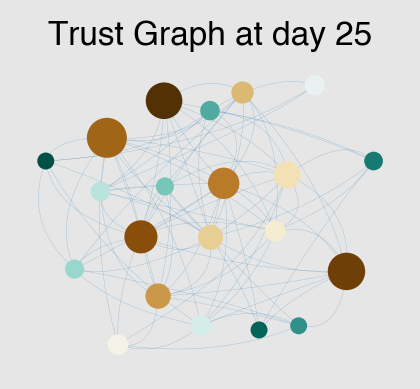

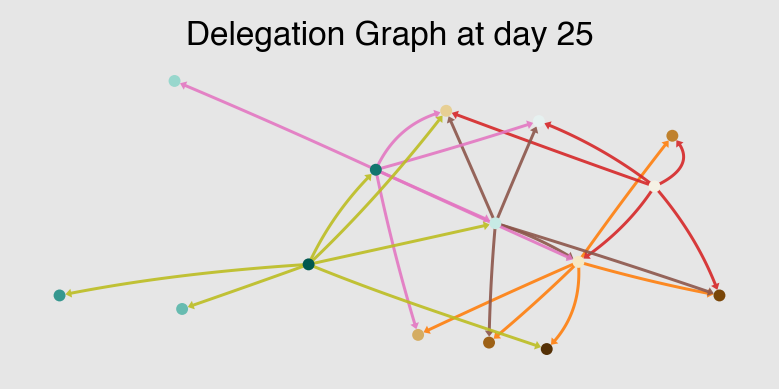

In [9]:
render_trust_delegation_graphs(25)

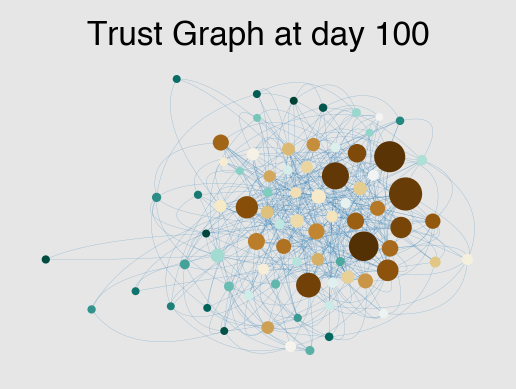

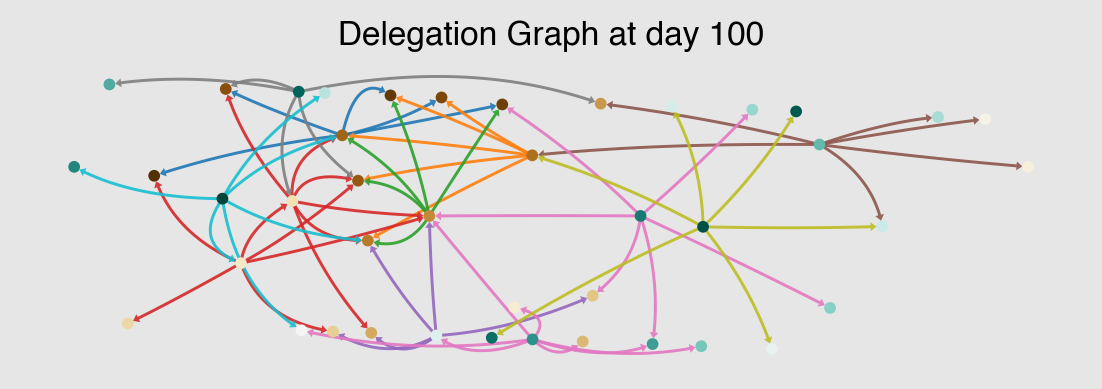

In [10]:
render_trust_delegation_graphs(-1)